In [1]:
#Loading in libraries
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


SMALL_SIZE = 10
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rcParams['figure.facecolor'] = 'white'

#CHALLENGE1
# Reading in the data from MTA turstiles: Load in 3 weeks of data (May 4-25th of 2019) from New York 
# Subway station turnstiles

s2=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
s3=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
s4=pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')

#Concatonate the data files into a single dataframe and strip column names of additional punctuation

df=pd.concat([s2,s3,s4], ignore_index=True)
df.columns = [column.strip() for column in df.columns]






In [2]:
#CHALLENGE2, could have included datetime format using parse_dates, but alternative method commmented below
#combine date and time into one datetime column, dtype = datetime
df['datetime']=pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S") 



In [3]:
#CHALLENGE3-
#find difference between ENTRIES to find how many actually entered thru each turnstile 
#(every 4 hours) regardless of day and drop na rows from dataframe
df['ENTRIES_diff_1']=df.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff()  


df.dropna(subset=["ENTRIES_diff_1"], axis=0, inplace=True)




In [4]:
#some stations had extremely inaccurate counts such as a million entries within 4 hours. 
#others had negative entries. Remove any station that has such entries. Apply function across all rows

def get_hour_count(row,max):
    
    clean_entry=row['ENTRIES_diff_1']
    if clean_entry<0:
        clean_entry= -clean_entry
    if clean_entry>max:
        clean_entry=0
    return clean_entry
                        
df["HOUR_ENTRIES"]=df.apply(get_hour_count, axis=1, max=1000000)
df['HOUR_ENTRIES'].sort_values()


616131         0.0
120717         0.0
399907         0.0
399908         0.0
120712         0.0
            ...   
115840    648437.0
330984    666416.0
557287    724314.0
137895    863698.0
531964    899265.0
Name: HOUR_ENTRIES, Length: 611262, dtype: float64

In [5]:
#now sum the differences (or actual entries) by day and store in a separate dataframe groping by turnstile
df1=df.groupby(['C/A','UNIT','SCP','STATION','DATE']).HOUR_ENTRIES.sum().reset_index()  

df1.head(10)


C/A  UNIT       SCP STATION        DATE  HOUR_ENTRIES
0  A002  R051  02-00-00   59 ST  05/04/2019         560.0
1  A002  R051  02-00-00   59 ST  05/05/2019         635.0
2  A002  R051  02-00-00   59 ST  05/06/2019        1439.0
3  A002  R051  02-00-00   59 ST  05/07/2019        1470.0
4  A002  R051  02-00-00   59 ST  05/08/2019        1574.0
5  A002  R051  02-00-00   59 ST  05/09/2019        1549.0
6  A002  R051  02-00-00   59 ST  05/10/2019        1561.0
7  A002  R051  02-00-00   59 ST  05/11/2019         877.0
8  A002  R051  02-00-00   59 ST  05/12/2019         536.0
9  A002  R051  02-00-00   59 ST  05/13/2019        1295.0

(21, 7)
    index   C/A  UNIT       SCP          STATION        DATE  HOUR_ENTRIES
0   14246  G001  R151  00-00-00  CONEY IS-STILLW  05/04/2019         836.0
1   14247  G001  R151  00-00-00  CONEY IS-STILLW  05/05/2019         659.0
2   14248  G001  R151  00-00-00  CONEY IS-STILLW  05/06/2019         921.0
3   14249  G001  R151  00-00-00  CONEY IS-STILLW  05/07/2019         990.0
4   14250  G001  R151  00-00-00  CONEY IS-STILLW  05/08/2019         897.0
5   14251  G001  R151  00-00-00  CONEY IS-STILLW  05/09/2019         900.0
6   14252  G001  R151  00-00-00  CONEY IS-STILLW  05/10/2019         884.0
7   14253  G001  R151  00-00-00  CONEY IS-STILLW  05/11/2019        1132.0
8   14254  G001  R151  00-00-00  CONEY IS-STILLW  05/12/2019         548.0
9   14255  G001  R151  00-00-00  CONEY IS-STILLW  05/13/2019         806.0
10  14256  G001  R151  00-00-00  CONEY IS-STILLW  05/14/2019         832.0
11  14257  G001  R151  00-00-00  CONEY IS-STILLW  05/15/2019         986.0
12  14258  G001  

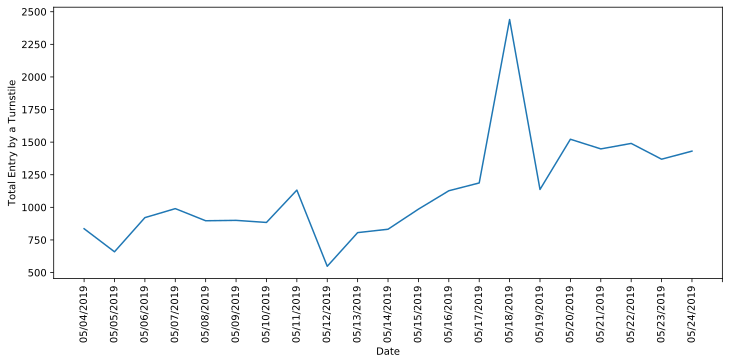

In [6]:
#CHALLENGE4
#pick a single turnstile using a mask and create a plot to view to view its entries by date
mask2 =(df1['C/A']=='G001') & (df1['UNIT']=='R151') & (df1['SCP']=='00-00-00') & (df1['STATION']=='CONEY IS-STILLW') 
df2=df1[mask2].reset_index()
print(df2.shape)
print(df2)
plt.figure(figsize=(12,5))
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Total Entry by a Turnstile")
plt.plot(df2['DATE'],df2['HOUR_ENTRIES'])



In [11]:
#CHALLENGE5 
df3=df.groupby(['C/A','UNIT','STATION','DATE']).HOUR_ENTRIES.sum() 
#sum by each ControlArea/Unit/Station to get all turnstile entries insde a station
print(df3.head())



C/A   UNIT  STATION  DATE      
A002  R051  59 ST    05/04/2019     6326.0
                     05/05/2019     6566.0
                     05/06/2019    12318.0
                     05/07/2019    13433.0
                     05/08/2019    14125.0
Name: HOUR_ENTRIES, dtype: float64


In [12]:
#CHALLENGE6
#create another dataframe to show the entries by day of week
df4=df.groupby(['STATION','DATE']).HOUR_ENTRIES.sum().reset_index()
df4['Date']=pd.to_datetime(df4['DATE']) 
df4['Day']=df4['Date'].dt.dayofweek
df4


STATION        DATE  HOUR_ENTRIES       Date  Day
0          1 AV  05/04/2019        4907.0 2019-05-04    5
1          1 AV  05/05/2019        5747.0 2019-05-05    6
2          1 AV  05/06/2019       17428.0 2019-05-06    0
3          1 AV  05/07/2019       18630.0 2019-05-07    1
4          1 AV  05/08/2019       19368.0 2019-05-08    2
...         ...         ...           ...        ...  ...
7909  ZEREGA AV  05/20/2019        2745.0 2019-05-20    0
7910  ZEREGA AV  05/21/2019        2856.0 2019-05-21    1
7911  ZEREGA AV  05/22/2019        2872.0 2019-05-22    2
7912  ZEREGA AV  05/23/2019        2768.0 2019-05-23    3
7913  ZEREGA AV  05/24/2019        2737.0 2019-05-24    4

[7914 rows x 5 columns]

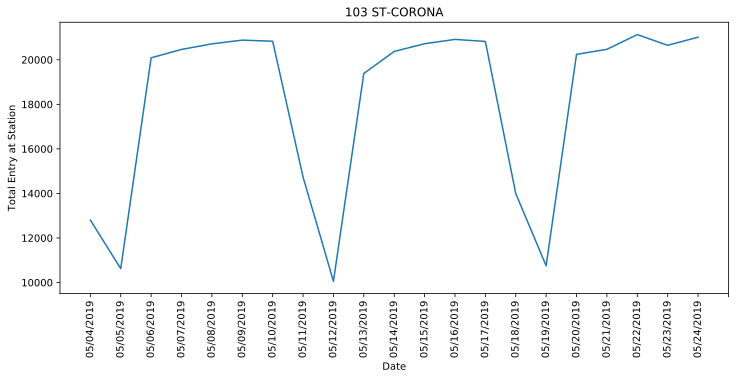

In [13]:
#CHALLENGE7
x=df4.STATION[50] #Select a random station to demonstrate the entry pattern over a the course of a day
df5=df4.loc[df4["STATION"]==x].reset_index() 
plt.figure(figsize=(12,5))
plt.title(x)
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.ylabel("Total Entry at Station")
plt.xlabel("Date")
plt.plot(df5['DATE'],df5['HOUR_ENTRIES'])
plt.savefig('plot_station_may.png', bbox_inches = "tight")
plt.savefig('plot_station_may.svg', bbox_inches = "tight")

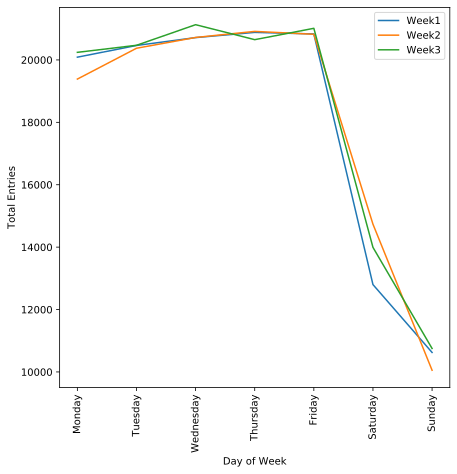

In [14]:
#CHALLENGE8
df5_week1=df5[['HOUR_ENTRIES','Date','Day']].loc[range(0,7)] #isolate week1 
df5_week2=df5[['HOUR_ENTRIES','Date','Day']].loc[range(7,14)] #isolate week2
df5_week3=df5[['HOUR_ENTRIES','Date','Day']].loc[range(14,21)] #isolate week3 

week1_count_list=df5_week1.sort_values(by='Day').HOUR_ENTRIES.tolist() #sort by day (monday=0) and convert to list 
week2_count_list=df5_week2.sort_values(by='Day').HOUR_ENTRIES.tolist()
week3_count_list=df5_week3.sort_values(by='Day').HOUR_ENTRIES.tolist()
#Plot average over 3 weak period by day
plt.figure(figsize=(7,7))
plt.ylabel("Total Entries")
plt.xlabel("Day of Week")
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(rotation='vertical')
week1=plt.plot(week,week1_count_list, label='Week1')
week2=plt.plot(week,week2_count_list, label='Week2')
week3=plt.plot(week,week3_count_list, label='Week3')
plt.legend()
plt.savefig('day_of_week_total.png', bbox_inches = "tight")
plt.savefig('day_of_week_total.svg', bbox_inches = "tight")


In [15]:
#CHALLENGE9 
#find stations with highest entries over the 3 weeks
df4.groupby("STATION").HOUR_ENTRIES.sum().sort_values(ascending=False)


STATION
34 ST-PENN STA     3125460.0
TIMES SQ-42 ST     2786669.0
GRD CNTRL-42 ST    2715870.0
14 ST-UNION SQ     2413741.0
PATH NEW WTC       2385657.0
                     ...    
ROCKAWAY PARK B      11215.0
BEACH 98 ST           7735.0
BROAD CHANNEL         5620.0
BEACH 105 ST          3803.0
ORCHARD BEACH           10.0
Name: HOUR_ENTRIES, Length: 378, dtype: float64

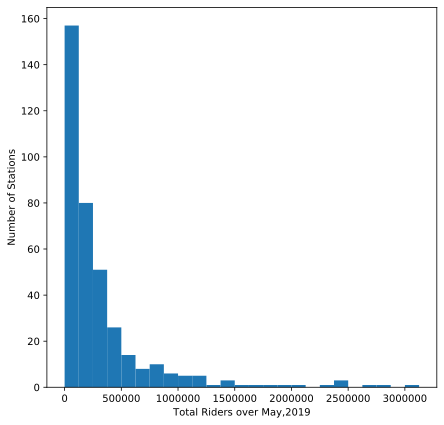

In [16]:
#CHALLENGE10
#make historgram to show distribution of total ridership amongst stations
#chart inidicates a few top stations in terms of ridership which should be targeted
total_ridership_counts=df4.groupby("STATION").HOUR_ENTRIES.sum().sort_values(ascending=False).tolist()
plt.figure(figsize=(7,7))
plt.ylabel("Number of Stations")
plt.xlabel("Total Riders over May,2019")
plt.ticklabel_format(style='plain')
plt.hist(total_ridership_counts,25)
plt.savefig('histogram_stations.png',bbox_inches = "tight")
plt.savefig('histogram_stations.svg',bbox_inches = "tight")

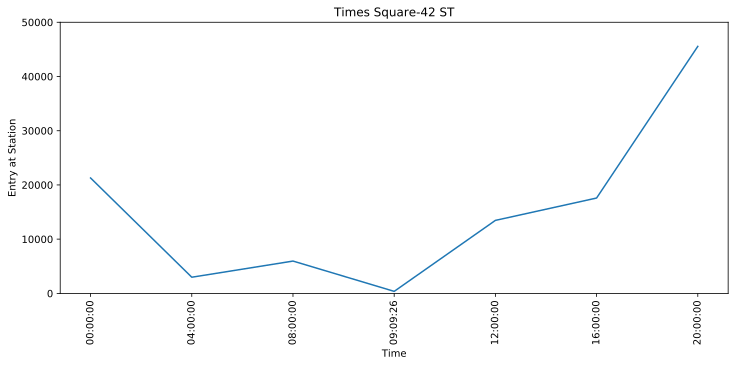

In [17]:
#Pick a top 5 stations and show by hour on Wednesday 05/08/2019, Wed because peak travel day 
#Times Square
df7=df.groupby(['STATION','DATE','TIME']).HOUR_ENTRIES.sum().reset_index() #station traffic by date and time
df8=df7[(df7['STATION']=='TIMES SQ-42 ST') & (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Times Square-42 ST')
plt.xticks(rotation='vertical')
plt.ylabel("Entry at Station")
plt.xlabel("Time")
plt.ylim([0, 50000])
plt.plot(df8['TIME'],df8['HOUR_ENTRIES'])
plt.savefig('times_square_day.png',bbox_inches = "tight")
plt.savefig('times_square_day.svg',bbox_inches = "tight")

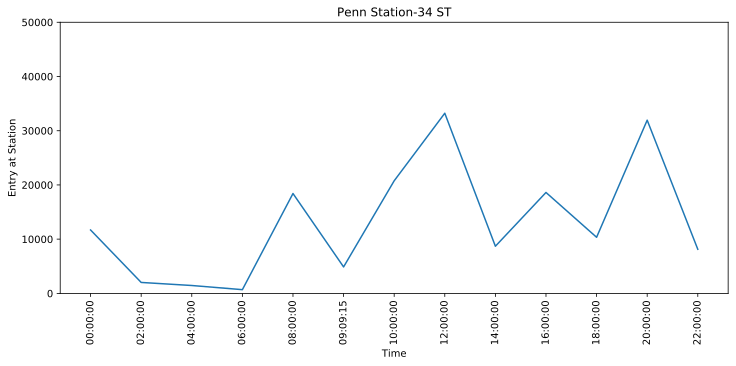

In [18]:
#Penn Station
df9=df7[(df7['STATION']=='34 ST-PENN STA')& (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Penn Station-34 ST')
plt.xticks(rotation='vertical')
plt.ylabel("Entry at Station")
plt.xlabel("Time")
plt.ylim([0, 50000])
plt.plot(df9['TIME'],df9['HOUR_ENTRIES'])
plt.savefig('penn_station_day.png',bbox_inches = "tight")
plt.savefig('penn_station_day.svg',bbox_inches = "tight")

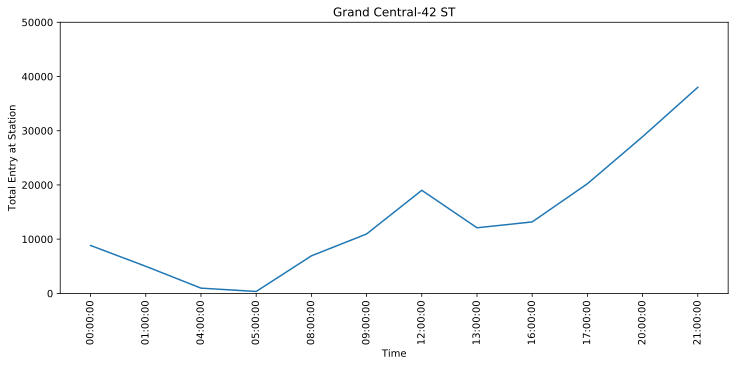

In [19]:
#Grand Central
df10=df7[(df7['STATION']=='GRD CNTRL-42 ST')& (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Grand Central-42 ST')
plt.xticks(rotation='vertical')
plt.ylabel("Total Entry at Station")
plt.xlabel("Time")
plt.ylim([0, 50000])
plt.plot(df10['TIME'],df10['HOUR_ENTRIES'])
plt.savefig('grand_central_day.png',bbox_inches = "tight")
plt.savefig('grand_central_day.svg',bbox_inches = "tight")

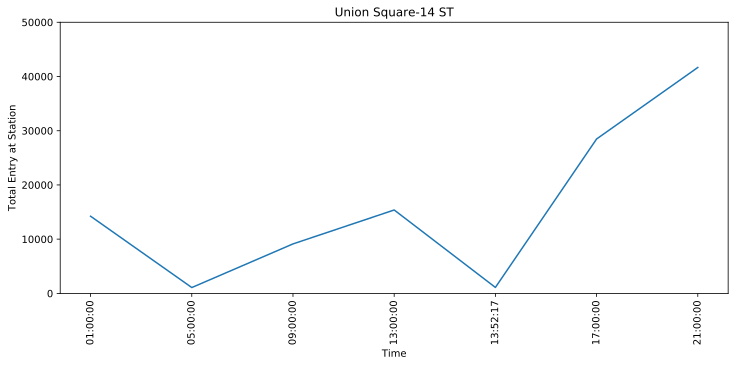

In [20]:
#Union Square
df11=df7[(df7['STATION']=='14 ST-UNION SQ')& (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Union Square-14 ST')
plt.xticks(rotation='vertical')
plt.ylabel("Total Entry at Station")
plt.xlabel("Time")
plt.ylim([0, 50000])
plt.plot(df11['TIME'],df11['HOUR_ENTRIES'])
plt.savefig('union_square_day.png',bbox_inches='tight')
plt.savefig('union_square_day.svg',bbox_inches='tight')

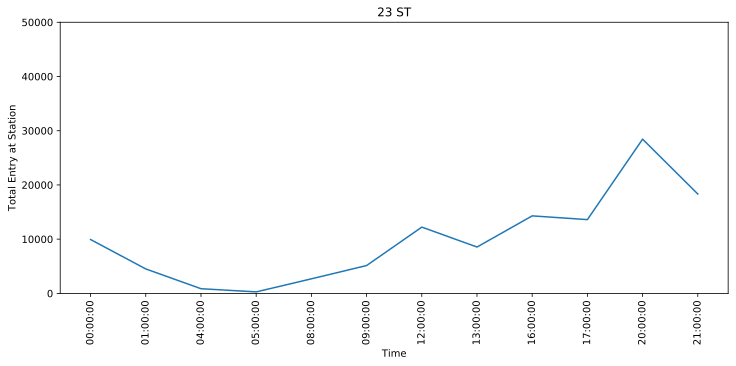

In [21]:
#23 ST
df12=df7[(df7['STATION']=='23 ST')& (df7['DATE']=='05/09/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('23 ST')
plt.xticks(rotation='vertical')
plt.ylabel("Total Entry at Station")
plt.xlabel("Time")
plt.ylim([0, 50000])
plt.plot(df12['TIME'],df12['HOUR_ENTRIES'])
plt.savefig('23_ST_day.png', bbox_inches='tight')
plt.savefig('23_ST_day.svg', bbox_inches='tight')

STATION
34 ST-PENN STA     3125460.0
TIMES SQ-42 ST     2786669.0
GRD CNTRL-42 ST    2715870.0
14 ST-UNION SQ     2413741.0
PATH NEW WTC       2385657.0
23 ST              2383429.0
34 ST-HERALD SQ    2317752.0
86 ST              2066617.0
42 ST-PORT AUTH    1978211.0
FULTON ST          1759706.0
BROOKLYN BRIDGE    1641101.0
125 ST             1533572.0
GROVE STREET       1435365.0
CANAL ST           1420887.0
59 ST COLUMBUS     1397946.0
14TH STREET        1361593.0
96 ST              1221151.0
LACKAWANNA         1221001.0
14 ST              1216929.0
59 ST              1213694.0
Name: HOUR_ENTRIES, dtype: float64

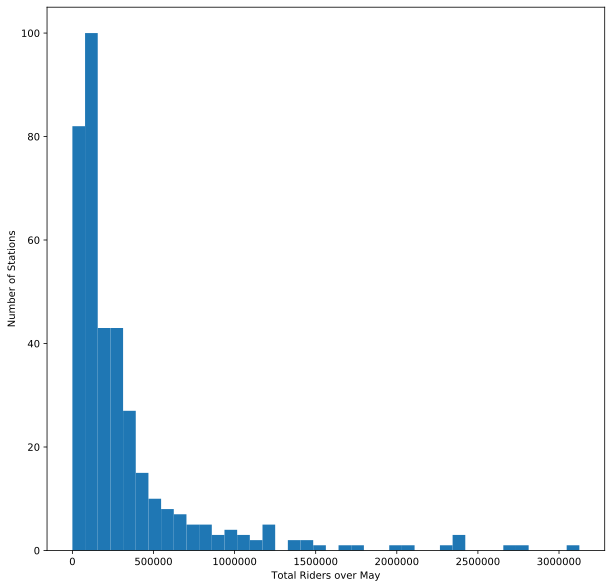

In [22]:
#group turnstiles by stations and sum the total entries over the 3 week sample period
total_ridership_counts=df4.groupby("STATION").HOUR_ENTRIES.sum().sort_values(ascending=False).tolist()
plt.figure(figsize=(10,10))
plt.ylabel("Number of Stations")
plt.xlabel("Total Riders over May")
plt.hist(total_ridership_counts,40);
df4.groupby("STATION").HOUR_ENTRIES.sum().sort_values(ascending=False).head(20)




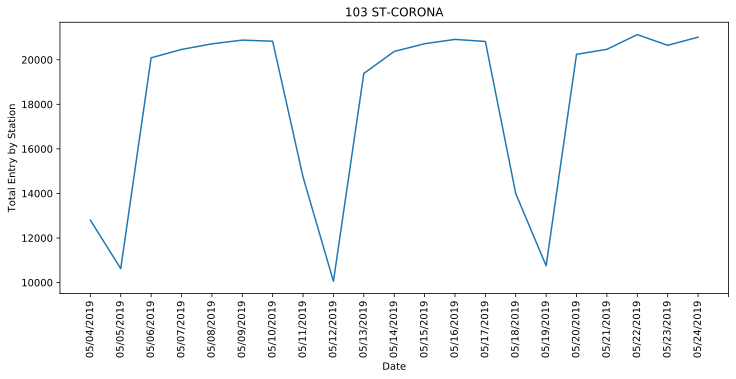

In [23]:
x=df4.STATION[50] #Pick a random station and show by date over 3 week period to reveal repeating pattern
df5=df4.loc[df4["STATION"]==x].reset_index() 
plt.figure(figsize=(12,5))
plt.title(x)
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.ylabel("Total Entry by Station")
plt.xlabel("Date")
plt.plot(df5['DATE'],df5['HOUR_ENTRIES'])



index         STATION        DATE      TIME  HOUR_ENTRIES
0  82054  TIMES SQ-42 ST  05/08/2019  00:00:00       21283.0
1  82055  TIMES SQ-42 ST  05/08/2019  04:00:00        2983.0
2  82056  TIMES SQ-42 ST  05/08/2019  08:00:00        5961.0
3  82057  TIMES SQ-42 ST  05/08/2019  09:09:26         373.0
4  82058  TIMES SQ-42 ST  05/08/2019  12:00:00       13464.0
5  82059  TIMES SQ-42 ST  05/08/2019  16:00:00       17588.0
6  82060  TIMES SQ-42 ST  05/08/2019  20:00:00       45553.0

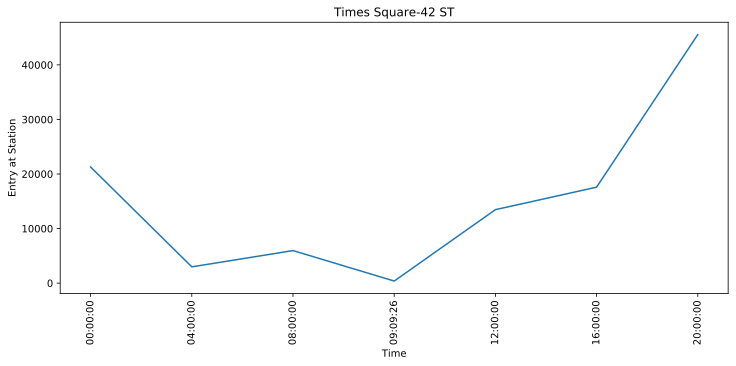

In [24]:
#group by sation and date to show entries by hour over the course of a day
df7=df.groupby(['STATION','DATE','TIME']).HOUR_ENTRIES.sum().reset_index() #station traffic by date and time
df8=df7[(df7['STATION']=='TIMES SQ-42 ST') & (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Times Square-42 ST')
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.ylabel("Entry at Station")
plt.xlabel("Time")
plt.plot(df8['TIME'],df8['HOUR_ENTRIES'])
df8.head(10)



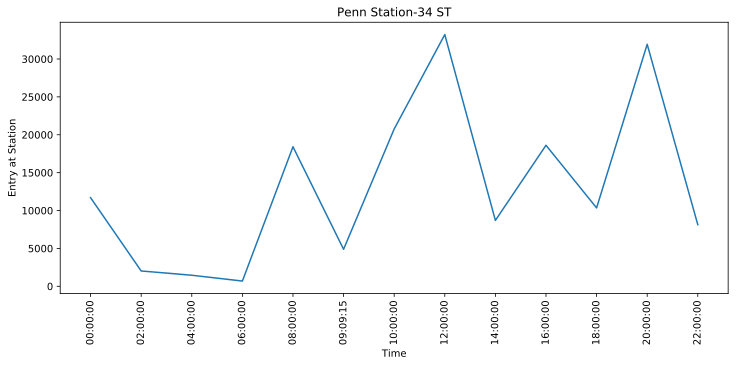

In [25]:
#Pick most ideal station and show by hour 
df7=df.groupby(['STATION','DATE','TIME']).HOUR_ENTRIES.sum().reset_index() #station traffic by date and time
df8=df7[(df7['STATION']=='34 ST-PENN STA')& (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Penn Station-34 ST')
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.ylabel("Entry at Station")
plt.xlabel("Time")
plt.plot(df8['TIME'],df8['HOUR_ENTRIES'])


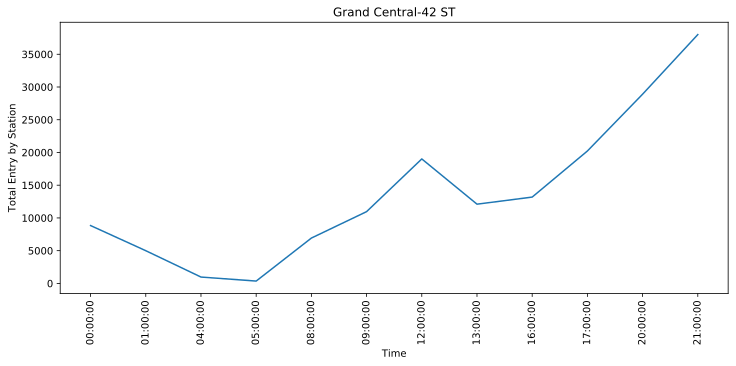

In [26]:
#Pick top 5 station and show by hour in order to compare with others on same date
df7=df.groupby(['STATION','DATE','TIME']).HOUR_ENTRIES.sum().reset_index() #station traffic by date and time
df8=df7[(df7['STATION']=='GRD CNTRL-42 ST')& (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Grand Central-42 ST')
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.ylabel("Total Entry by Station")
plt.xlabel("Time")
plt.plot(df8['TIME'],df8['HOUR_ENTRIES'])


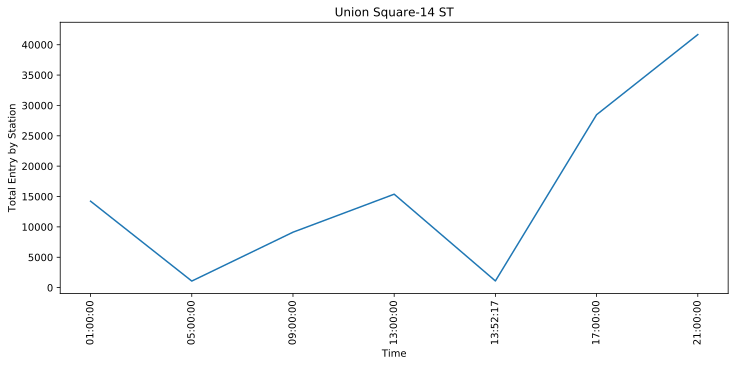

In [27]:
#Pick top 5 station and show by hour in order to compare with others on same date
df7=df.groupby(['STATION','DATE','TIME']).HOUR_ENTRIES.sum().reset_index() #station traffic by date and time
df8=df7[(df7['STATION']=='14 ST-UNION SQ')& (df7['DATE']=='05/08/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title('Union Square-14 ST')
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.ylabel("Total Entry by Station")
plt.xlabel("Time")
plt.plot(df8['TIME'],df8['HOUR_ENTRIES'])


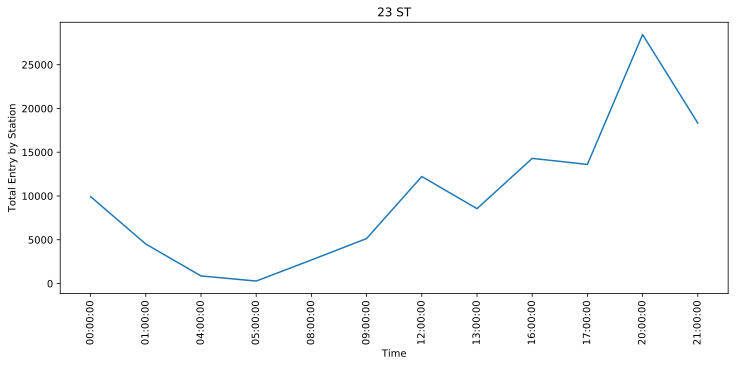

In [28]:
#Pick top 5 station and show by hour in order to compare with others on same date
df7=df.groupby(['STATION','DATE','TIME']).HOUR_ENTRIES.sum().reset_index() #station traffic by date and time
df8=df7[(df7['STATION']=='23 ST')& (df7['DATE']=='05/09/2019')].reset_index()

plt.figure(figsize=(12,5))
plt.title('23 ST')
plt.xticks(rotation='vertical')
plt.ylabel("Total Entry by Station")
plt.xlabel("Time")
plt.plot(df8['TIME'],df8['HOUR_ENTRIES'])


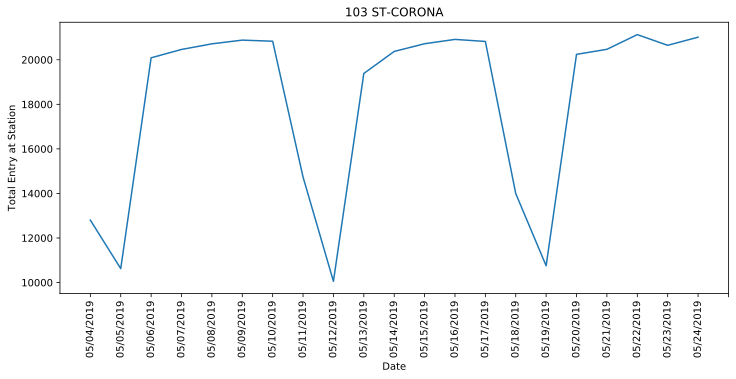

In [29]:
#REPEAT: challange7 repeat figure with slightly different metrics
plt.rcParams['figure.facecolor'] = 'white'
x=df4.STATION[50] #Pick a station
df5=df4.loc[df4["STATION"]==x].reset_index() 
plt.figure(figsize=(12,5))
plt.title(x)
plt.xticks(np.arange(0,60,step=1), rotation='vertical')
plt.ylabel("Total Entry at Station")
plt.xlabel("Date")
plt.plot(df5['DATE'],df5['HOUR_ENTRIES'])
plt.savefig('test1.png', bbox_inches = "tight")




In [30]:
# The following blocks of code are some addtional figure and analysis work 
# which was not included in the project conclusions





In [31]:
df['HOUR_ENTRIES'].sort_values(ascending=False)

531964    899265.0
137895    863698.0
557287    724314.0
330984    666416.0
115840    648437.0
            ...   
120712         0.0
399908         0.0
399907         0.0
120717         0.0
616131         0.0
Name: HOUR_ENTRIES, Length: 611262, dtype: float64

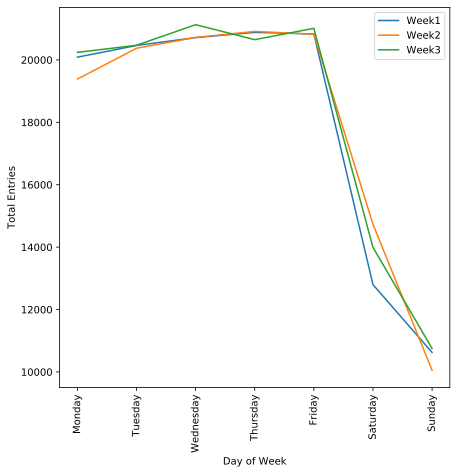

In [32]:
plt.figure(figsize=(7,7))
plt.ylabel("Total Entries")
plt.xlabel("Day of Week")
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(rotation='vertical')
week1=plt.plot(week,week1_count_list, label='Week1')
week2=plt.plot(week,week2_count_list, label='Week2')
week3=plt.plot(week,week3_count_list, label='Week3')
plt.legend()
plt.savefig('day_of_week_total.png', bbox_inches = "tight")
plt.savefig('day_of_week_total.svg', bbox_inches = "tight")


In [33]:
def graph_station(station_list):
    for station in station_list:
    
        df_for=df7[(df7['STATION']==station)& (df7['DATE']=='05/09/2019')].reset_index()
        plt.figure(figsize=(12,5))
        plt.title(station)
        plt.xticks(rotation='vertical')
        plt.ylabel("Total Entry at Station")
        plt.xlabel("Time")
        x=plt.plot(df_for['TIME'],df_for['HOUR_ENTRIES'])
        plt.savefig(str(station) + ".png", bbox_inches='tight')
    return x 


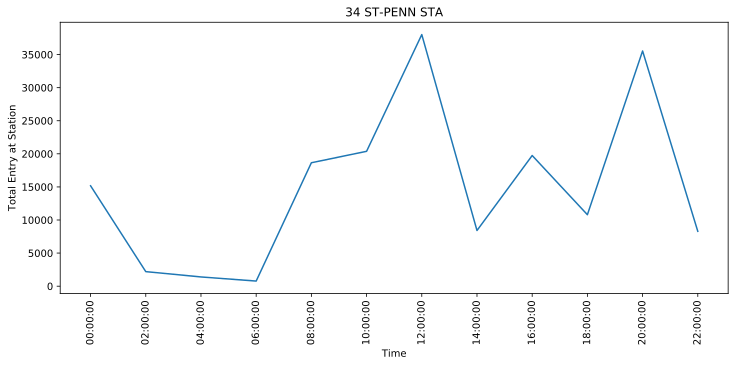

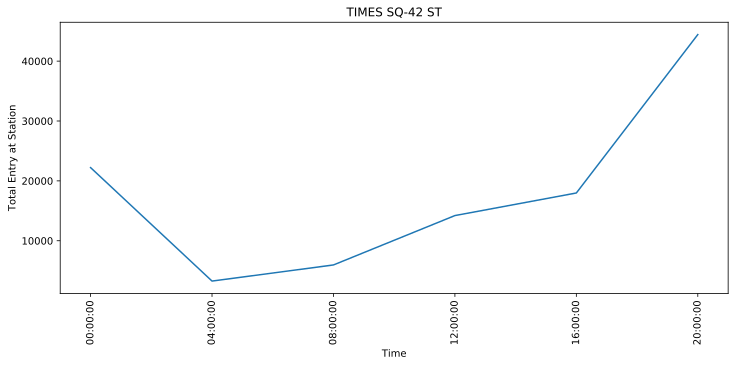

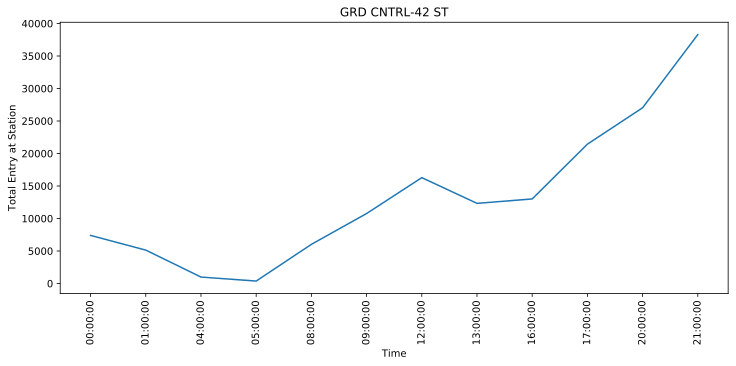

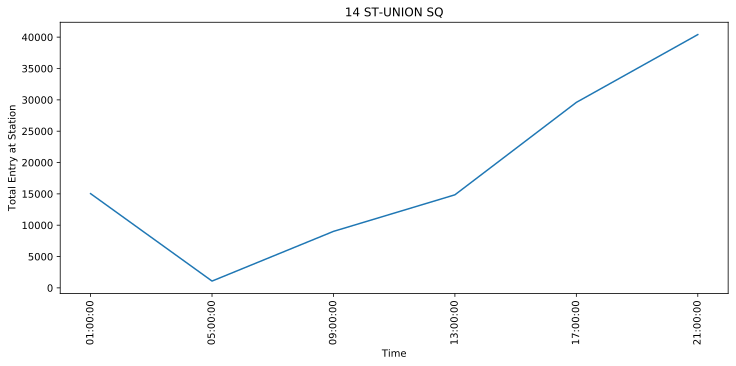

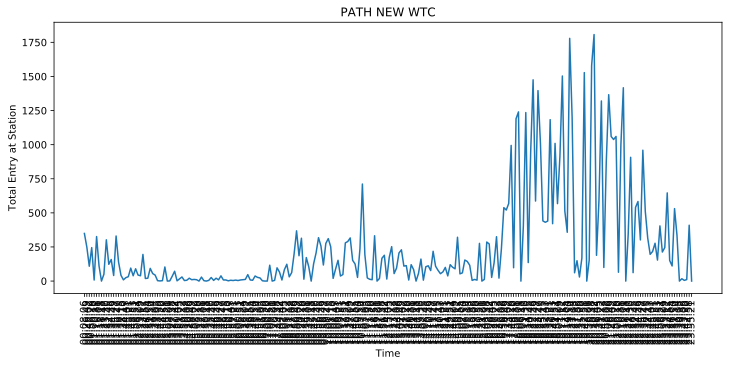

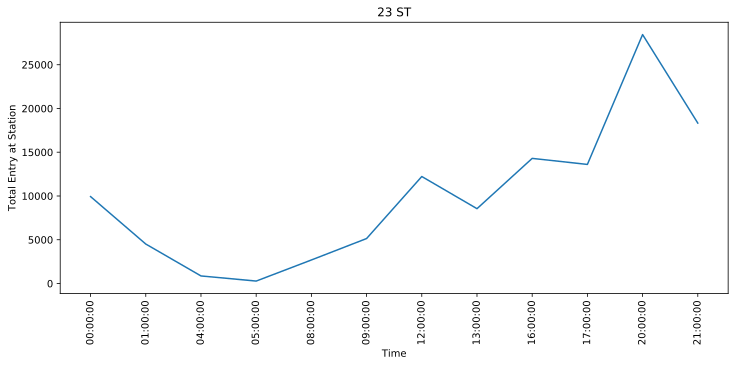

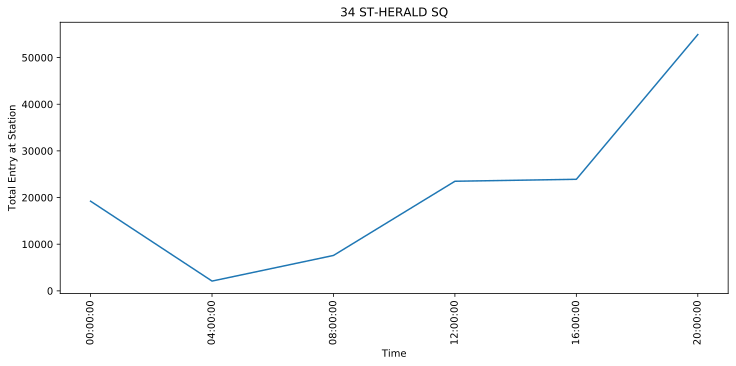

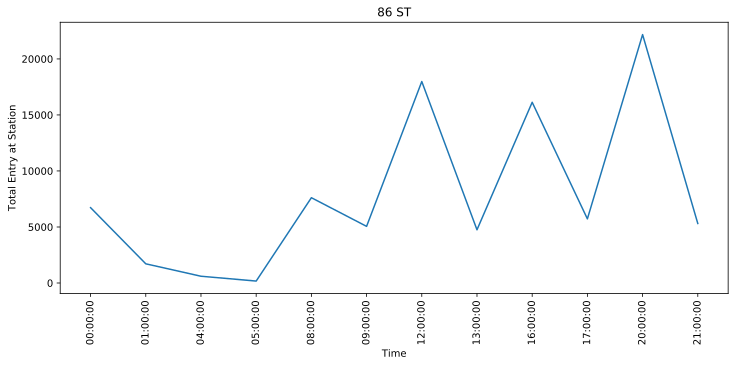

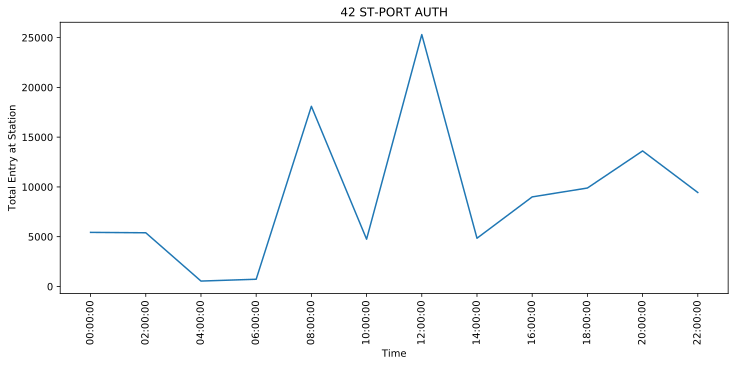

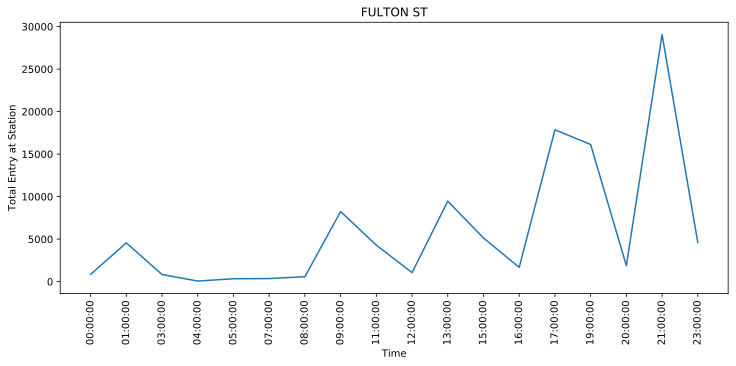

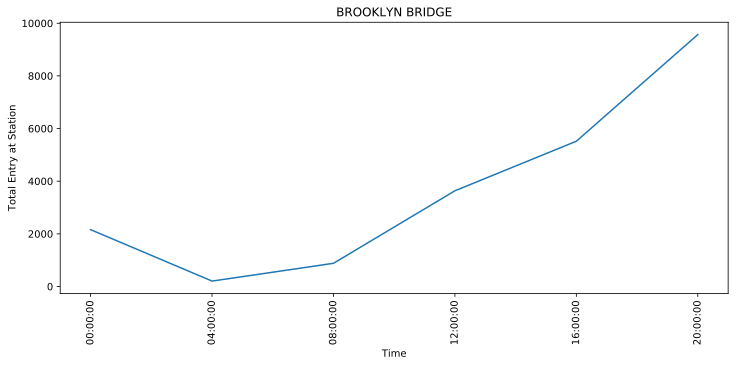

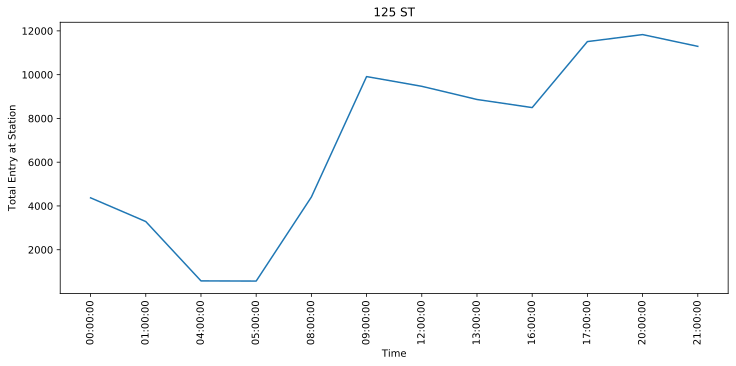

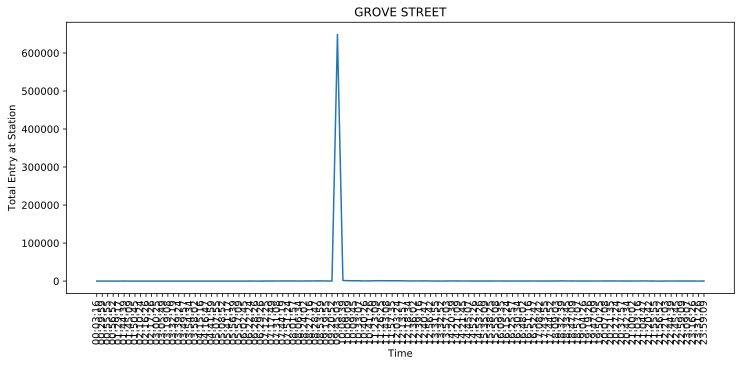

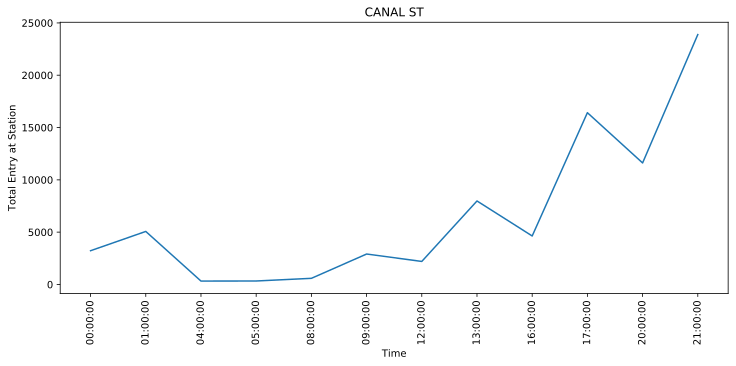

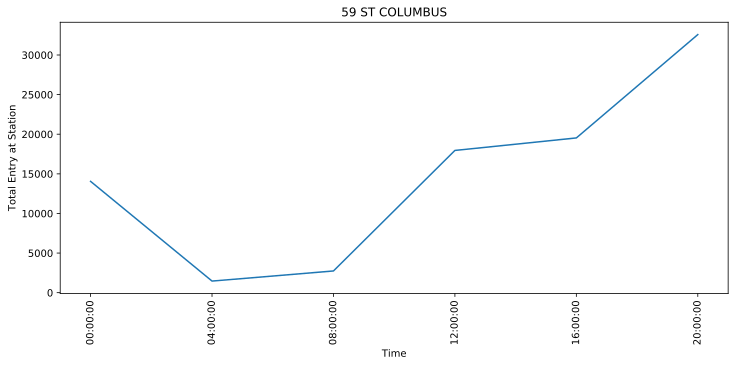

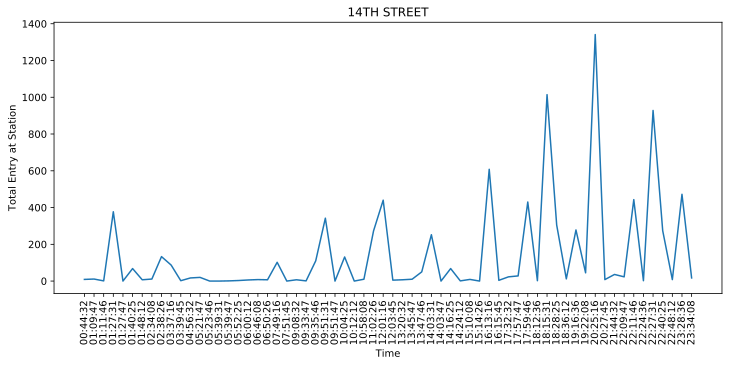

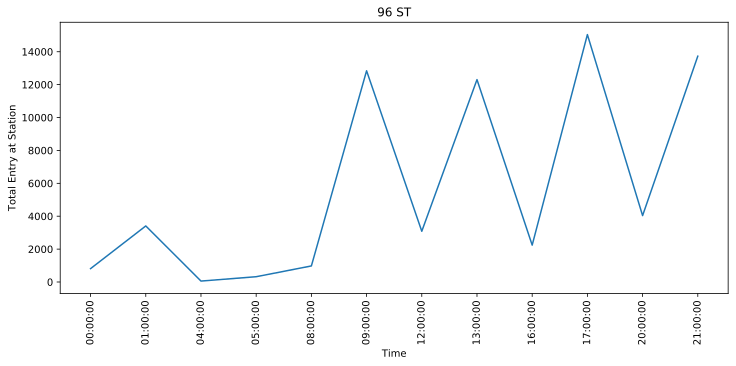

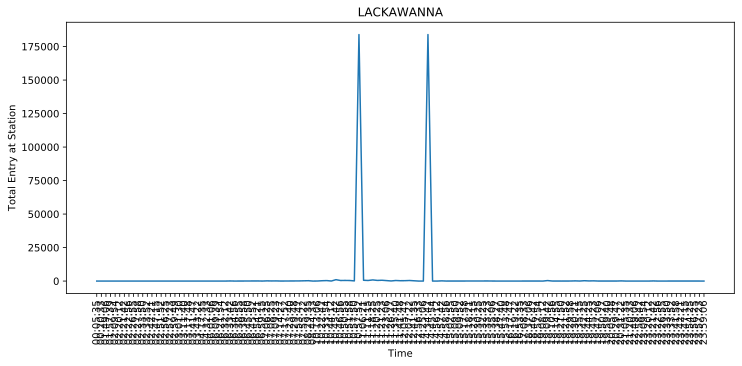

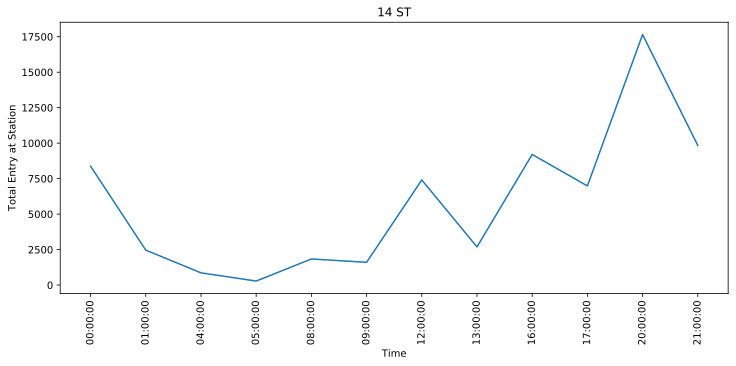

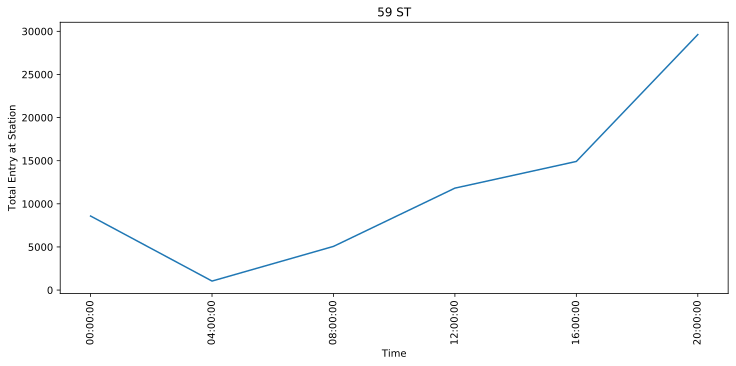

In [34]:
y=(df4.groupby("STATION").HOUR_ENTRIES.sum().sort_values(ascending=False).reset_index().head(20))["STATION"].tolist()
graph_station(y)



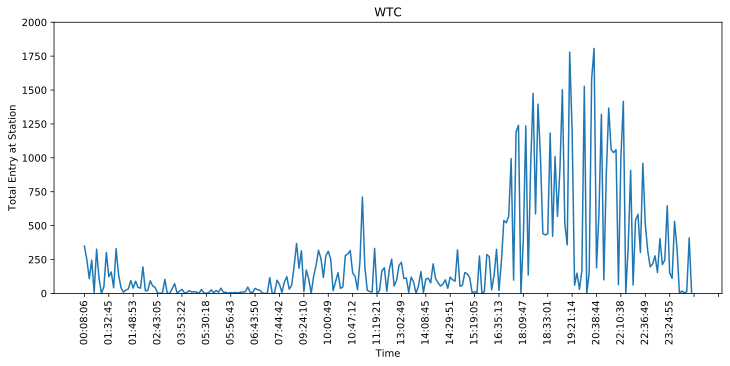

In [35]:
df_wtc=df7[(df7['STATION']=='PATH NEW WTC')& (df7['DATE']=='05/09/2019')].reset_index()
plt.figure(figsize=(12,5))
plt.title("WTC")
plt.xticks(ticks=range(0,1000,10),labels=None, rotation='vertical')
plt.ylabel("Total Entry at Station")
plt.xlabel("Time")
plt.ylim([0, 2000])
x=plt.plot(df_wtc['TIME'],df_wtc['HOUR_ENTRIES'])
plt.savefig('wtc_day.png', bbox_inches='tight')


In [36]:
df[df['STATION']=='14 ST'].head(10)
df[df['STATION']=='14TH STREET'].head(10)


C/A  UNIT       SCP      STATION LINENAME DIVISION        DATE  \
118867  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/04/2019   
118868  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/04/2019   
118869  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/04/2019   
118870  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/04/2019   
118871  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/04/2019   
118872  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/05/2019   
118873  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/05/2019   
118874  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/05/2019   
118875  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/05/2019   
118876  PTH11  R545  00-00-00  14TH STREET        1      PTH  05/05/2019   

            TIME     DESC  ENTRIES  EXITS            datetime  ENTRIES_diff_1  \
118867  06:51:46  REGULAR   587957  36873 2019-05-04 06:51:46            20.0   
118868  11:03:46  REGULAR   588005  36877 2019-05-04 11:03:46            48.0   
118869  15:15:46  REGULAR   588256  36887 2019-05-04 15:15:46           251.0   
118870  19:27:46  REGULAR   588705  36906 2019-05-04 19:27:46           449.0   
118871  23:39:46  REGULAR   588860  36939 2019-05-04 23:39:46           155.0   
118872  03:51:46  REGULAR   588903  36955 2019-05-05 03:51:46            43.0   
118873  08:03:46  REGULAR   588914  36982 2019-05-05 08:03:46            11.0   
118874  12:15:46  REGULAR   588969  37011 2019-05-05 12:15:46            55.0   
118875  16:27:46  REGULAR   589107  37014 2019-05-05 16:27:46           138.0   
118876  20:39:46  REGULAR   589313  37031 2019-05-05 20:39:46           206.0   

        HOUR_ENTRIES  
118867          20.0  
118868          48.0  
118869         251.0  
118870         449.0  
118871         155.0  
118872          43.0  
118873          11.0  
118874          55.0  
118875         138.0  
118876         206.0